<a href="https://colab.research.google.com/github/Raphael-Vargas-Moya/IA/blob/main/IA/Assignments/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5.- Artificial Neural Network: Feedforward

* Joshua Abdiel Bahena Piedras           2018505
* Jared Gutierrez Contreras              2131945
* Raphaël Vargas Moya                    2132207
* Dora Jazmín González Díaz              2049427
* Diego Eduardo Rodríguez Arreguín       2004407

Artificial Intelligence - LMVN2 - Biomedical Engineering

---

# **PART 1 - Load libraries**

This cell imports the necessary libraries for building and training the neural network. It includes **TensorFlow** for the model, **NumPy** for numerical operations, **Matplotlib** for plotting, and **Random** for the seed. It also prints the TensorFlow version to confirm the environment.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random as pr

print(tf.__version__)

2.19.0


---

# **PART 2 - Load Data**

 To keep results consistent, we setted a seed (42) in all of the libraries random seed parameters.

In [ ]:
def set_seed(seed):
  np.random.seed(seed)
  pr.seed(seed)
  tf.random.set_seed(seed)
set_seed(42)

This cell calls a function to get the pre-split MNIST dataset and assigns all four parts of that dataset (training images, training labels, test images, and test labels) to four separate and clearly named variables so you can easily use them.

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

# **PART 3 - Data Preprocessing**

We define an array of class names corresponding to the 10 digits. This will be used later for plotting the labels.

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

We explore the data to understand its structure. First, we check the shape of the `train_images`. This shows we have 60,000 images, each being 28x28 pixels.

In [ ]:
train_images.shape

(60000, 28, 28)

Next, we check the length of the `train_labels`, which should match the number of images (60,000).

In [ ]:
len(train_labels)

60000

We can inspect the `train_labels` array itself. As we can see, it contains integers from 0 to 9.

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We do the same for the test set, checking the shape of `test_images`. This shows 10,000 images, also 28x28 pixels.

In [ ]:
test_images.shape

(10000, 28, 28)

And we check the length of the `test_labels`.

In [ ]:
len(test_labels)

10000

To visualize the data, we use Matplotlib to display the first image in the training set. The color bar shows the pixel intensity values range from 0 (black) to 255 (white).

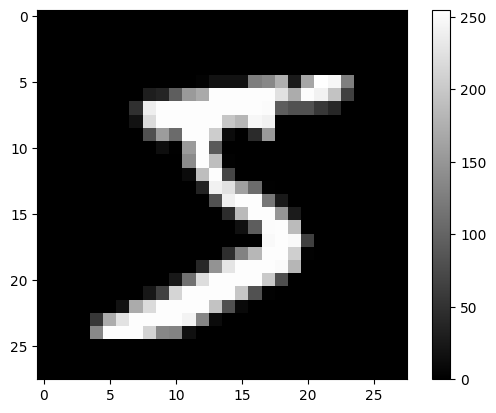

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

**Data Preprocessing:** Before feeding the images to the neural network, we scale the pixel values. We divide both the training and test images by 255.0 to normalize the data into a range of [0, 1]. This helps the model train more efficiently.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that our labels are correct, we display the first 25 images from the preprocessed training set, each with its corresponding class name.

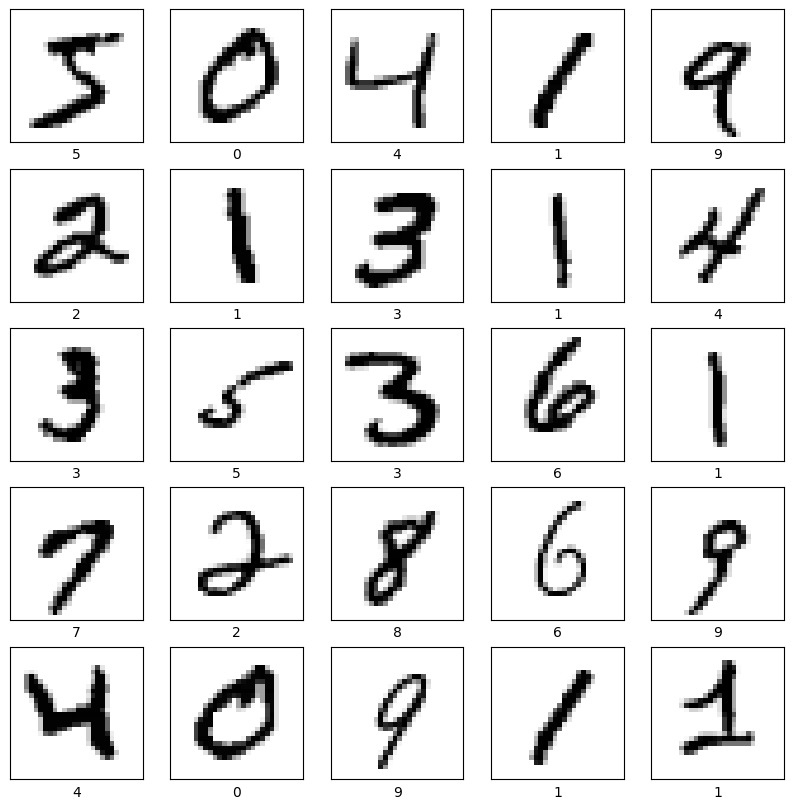

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

---

# **PART 4 - Model selection and training**

Now we build the Artificial Neural Network (ANN) model.
1.  **`tf.keras.Sequential`**: This defines a linear stack of layers.
2.  **`tf.keras.layers.Flatten`**: This layer transforms the 2D image (28x28 pixels) into a 1D array (784 pixels).
3.  **`tf.keras.layers.Dense`**: This is a fully connected layer. We use 128 neurons with a 'relu' (Rectified Linear Unit) activation function.
4.  **`tf.keras.layers.Dense`**: This is the final output layer. It has 10 neurons (one for each class). The 'softmax' activation function converts the raw output scores (logits) into probabilities, ensuring they sum to 1.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Before the model is ready for training, it needs to be compiled. We define:
* **`optimizer`**: 'adam' is an efficient optimizer that adjusts the model's weights.
* **`loss`**: 'SparseCategoricalCrossentropy' is used because our labels are integers (0-9) rather than one-hot encoded arrays.
* **`metrics`**: We monitor 'accuracy' during training.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

We train the model by calling the `model.fit()` method. The model learns the mapping between the `train_images` and `train_labels`. We train for 10 epochs (10 passes over the entire training dataset).

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8792 - loss: 0.4239
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9644 - loss: 0.1221
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9763 - loss: 0.0788
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0568
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9877 - loss: 0.0422
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0306
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0229
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0171
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9956 - loss: 0.0159
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0113


---

# **PART 5 - Model testing**

Now that the model is trained, we evaluate its performance on the `test_images` and `test_labels`. This tells us how well the model generalizes to new, unseen data. The training accuracy is usually higher than the test accuracy.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9762 - loss: 0.1011

Test accuracy: 0.9761999845504761


To make predictions, we can wrap our trained model in a `Sequential` model that adds a `Softmax` layer. This isn't strictly necessary since our original model already ends with 'softmax', but it makes it explicit that the output represents probabilities.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

We use the `predict` method on the `test_images` to get the model's output for the entire test set.

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Let's look at the prediction for the first image. The output is an array of 10 numbers, representing the model's "confidence" (probability) that the image corresponds to each of the 10 digits.

In [ ]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533675, 0.08533674,
       0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
      dtype=float32)

We can use `np.argmax` to find the index (the class) with the highest probability.

In [ ]:
print(np.argmax(predictions[0]))

7


We check this against the true label for the first test image. In this case, the prediction is correct.

In [ ]:
print(test_labels[0])

7


This helper function plots the test image, coloring the label blue for a correct prediction and red for an incorrect one. It also displays the predicted class, its confidence percentage, and the true class in parentheses.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

This second helper function plots the probability distribution for the 10 classes as a bar chart. It colors the correct label's bar blue and the (potentially incorrect) predicted label's bar red.

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's test our helper functions on the first image (index 0). We can see the model is very confident that it is a '7', which is correct.

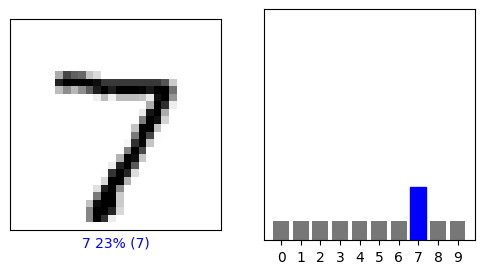

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Now let's look at an image the model gets wrong (e.g., index 61). The model predicts '2' with high confidence, but the true label is '8'. The visualization makes this error clear.

In [ ]:
for j in range(len(predictions)):
  if np.argmax(predictions[j])!=test_labels[j]:
    print('Index: ',j)
    print('Prediction: ',np.argmax(predictions[j]))
    print('Test: ',test_labels[j])
    break

Index:  61
Prediction:  2
Test:  8


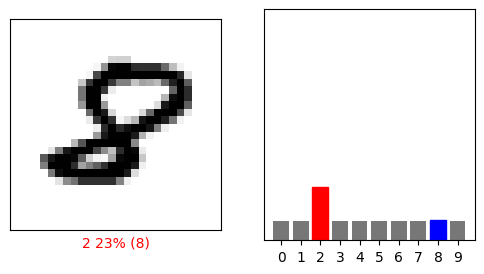

In [ ]:
i = 61
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

This code plots the first 15 test images (5 rows, 3 columns) along with their prediction plots to give a broader view of the model's successes and failures.

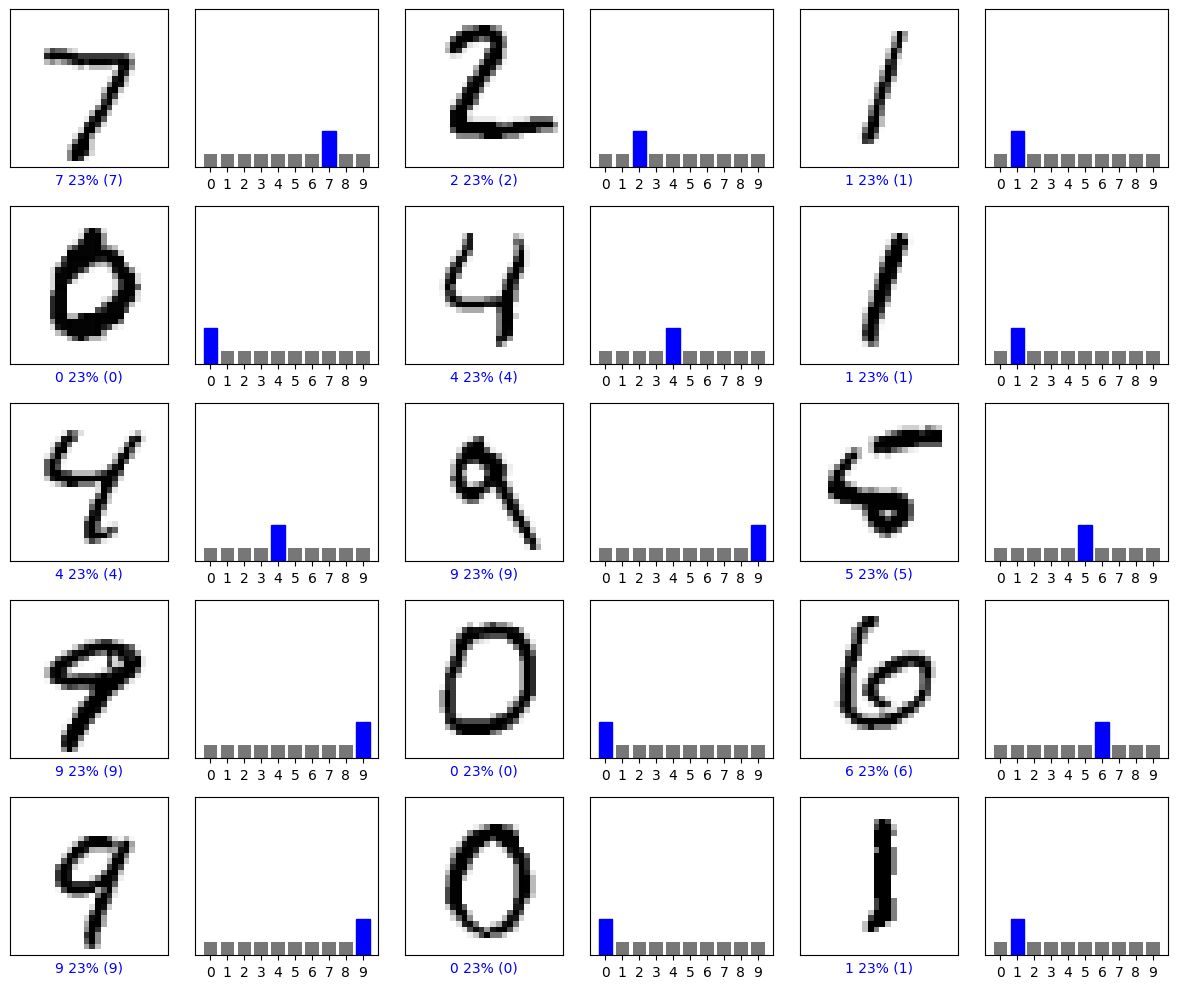

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finally, we'll use the model to predict a single image. First, we grab an image (e.g., the second one, at index 1) from the test dataset. Its shape is (28, 28).

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Keras models expect a *batch* of images. To create a batch containing just our single image, we use `np.expand_dims` to add a new dimension, changing the shape to (1, 28, 28).

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now we predict the label for this single image. The output is a batch containing one array of 10 probabilities.

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.0853368  0.08533721 0.23196837 0.0853368  0.0853368  0.0853368
  0.0853368  0.0853368  0.0853368  0.0853368 ]]


We use our `plot_value_array` function to visualize the prediction. We pass `predictions_single[0]` to get the probability array from the batch.

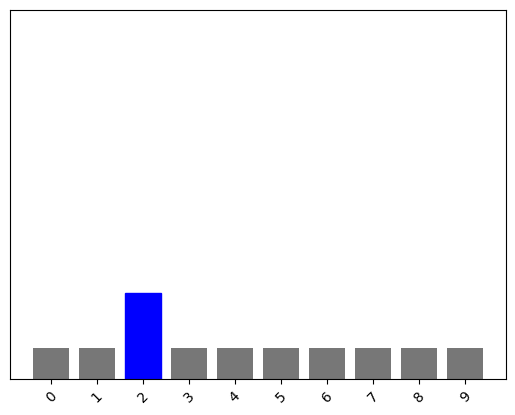

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

As before, `np.argmax` gives us the predicted class, which is '2'.

In [ ]:
np.argmax(predictions_single[0])

np.int64(2)